# TITANIC PREDICTION MODEL 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the csv file
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Cleaning

In [4]:
# check for null values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# two primarily ways to handle missing values
# is deleting or inserting missing values
df = df.drop(['Cabin'],axis=1)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
#since we need to drop rows with missing val
#removes row with missing values
df = df.dropna(axis=0)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.shape

(712, 11)

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
889    False
890    False
Length: 712, dtype: bool

## Data Pre-processing

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [14]:
df.nunique()

PassengerId    712
Survived         2
Pclass           3
Name           712
Sex              2
Age             88
SibSp            6
Parch            7
Ticket         541
Fare           219
Embarked         3
dtype: int64

In [15]:
df['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  19,  21,  22,  23,  24,  25,  26,  28,  31,  34,
        35,  36,  38,  39,  40,  41,  42,  44,  45,  50,  51,  52,  53,
        54,  55,  57,  58,  59,  60,  61,  63,  64,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  79,  80,  81,  82,  84,  85,  86,
        87,  89,  90,  91,  92,  93,  94,  95,  97,  98,  99, 100, 101,
       103, 104, 105, 106, 107, 109, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 123, 124, 125, 126, 128, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 161, 162, 163,
       164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 178, 179,
       180, 183, 184, 185, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       198, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 225, 22

In [16]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [17]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5], dtype=int64)

In [18]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

## Data Exploration

In [19]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [20]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


Text(0, 0.5, 'Sex ')

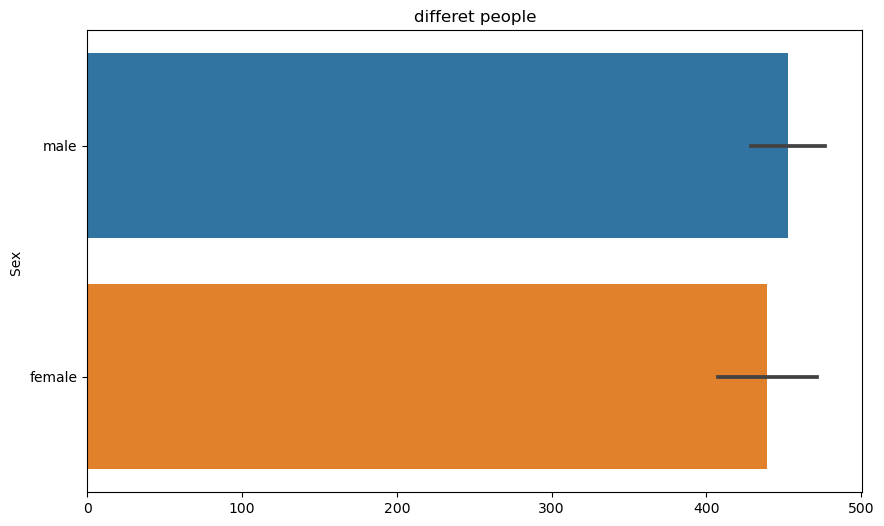

In [26]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("differet people")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.index, y=df['Sex'])

# Add label for vertical axis
plt.ylabel("Sex ")

<Axes: xlabel='Sex', ylabel='count'>

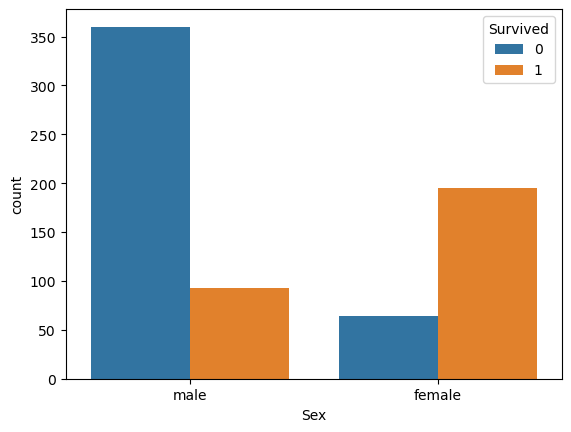

In [38]:
sns.countplot(x= df['Sex'],hue= df['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

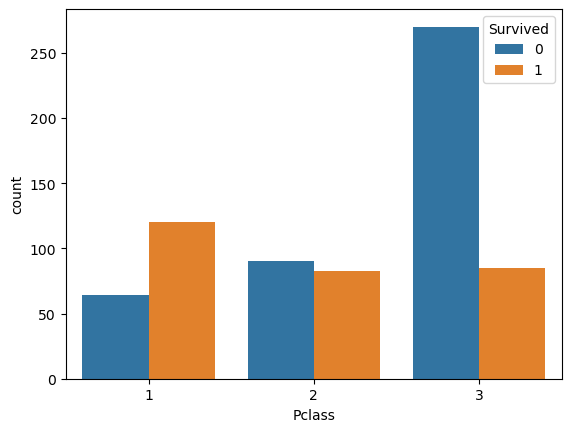

In [40]:
sns.countplot(x=df['Pclass'],hue = df['Survived'])

In [45]:
#to convert the sex column into int 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex'] = labelencoder.fit_transform(df['Sex'])

C:\Users\admin\AppData\Local\Temp\ipykernel_736\2624110140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = labelencoder.fit_transform(df['Sex'])


In [46]:
#let's check the dataframe
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [48]:
#let's compare the sex and surveved data 
df['Sex'],df['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 885    0
 886    1
 887    0
 889    1
 890    1
 Name: Sex, Length: 712, dtype: int32,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 712, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

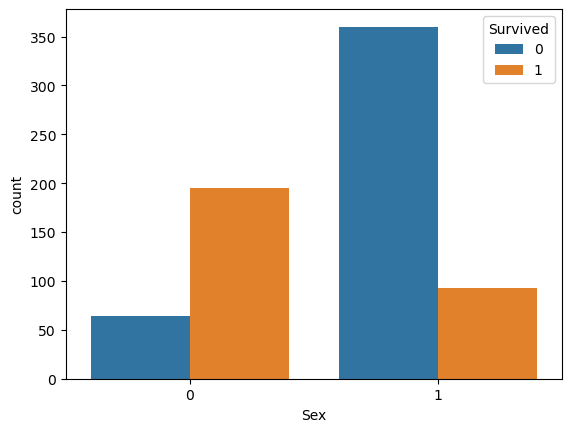

In [49]:
sns.countplot(x= df['Sex'],hue= df['Survived'])

## Model Training

In [51]:
X = df[['Age','Sex','Pclass']]
y= df['Survived']

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [54]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8531468531468531

In [57]:
print(y_pred)

[0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]


In [58]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)

In [59]:
log.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [60]:
pred = log.predict(X_test)

In [61]:
accuracy_score(pred,y_test)

0.8321678321678322

#### Decision Tree Classifier is more accurate than Logistic Regression

In [62]:
# Model Prediction
# predicted value of Desicion Tree Classifier
print(y_pred)

[0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]


In [63]:
print(y_test)

423    0
178    0
305    1
292    0
592    0
      ..
850    0
703    0
124    0
471    0
615    1
Name: Survived, Length: 143, dtype: int64


In [72]:
import warnings
warnings.filterwarnings('ignore')

result = classifier.predict([[1,2,5]])
if (result==1):
    print('Unable to survive!')
else:
    print('Yay! you Survived!')

Yay! you Survived!


In [73]:
import warnings
warnings.filterwarnings('ignore')

result = classifier.predict([[3,2,5]])
if (result==1):
    print('Unable to survive!')
else:
    print('Yay! you Survived!')

Unable to survive!
